In [10]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt


These are helper functions , made to generate Symmetric Positive Matrices and Row vectors for testing purposes.

In [11]:

def Generate_Symm_Pos_Matrix (n):
    A = np.random.randint(0, 10, size=(n,n)) 
    A = A.T @ A # This guarantees that the matrix is symmetric and as a consequence it is also Positive Definite
    A = np.matrix(A) # Typecasts into an matrix as the default output is a numpy array
    return A

def Generate_Answer_Vector(n):
    b = np.random.randint(0,10 ,size= n) # Generates a array of size n with entries between 0 and 10
    return b

The following chunck initialises the Matrix $A$ and Column Vector $b$ given a size $n$.
We set a tolerance to avoid any floating point arithemtic mistakes , however any small number is suitable for the convergence of the algorithm.
We also generate the Vector $x$ using matrix multiplication so we can check whether our algorithm is working as intended.

The program will ask for an input of the size parameter $n$

In [12]:
n = int(input("What size do you want the matrix to be?"))
A = Generate_Symm_Pos_Matrix(n)
print("Our matrix A is : \n"
       , A)
b = Generate_Answer_Vector(n)
b = b.reshape(-1,1)
print("Our Vector b is : \n ", 
    b.reshape(-1,1)) # Converting to a column vector
print("Our solution vector x should be :\n",A.getI() @ b.reshape(-1,1)) #Generating answer for the vector x

tol = np.finfo(b.astype(float).dtype).eps   # Choosing the smallest possible tolerance based on the file type


Our matrix A is : 
 [[ 87  34  64 116]
 [ 34  20   8  36]
 [ 64   8 133 101]
 [116  36 101 171]]
Our Vector b is : 
  [[4]
 [6]
 [7]
 [6]]
Our solution vector x should be :
 [[-12.24588477]
 [ 11.24125514]
 [  1.32613169]
 [  5.19238683]]


Implementing the Algorithm 

We have implemeted the algorithm following the pseudocode on the Wikipedia page.

When using excat arithmetic the algorithm should converge in n interations but due to the smallest possible choice of tolerance the algorithm converges in apporximately 2n iterations. This can be avoided by using a higher precision number system to do the computation or choosing a larger tolerance . This can affect the accuracy of the solution but it is still perfectly valid as an approximation

When checking to see if we can obtain vector b using our solution vector , we sometimes see very small numbers in scientific notaion (e.g-3.93995947e-12) in the vector instead of 0. This is due to the high precision methods used. We can change this by rounding down to 0 but this doesnt change the validity of our answer.

In [13]:

x = np.zeros((n,1)) # Choosing our intial guess as the zero vector with appropriate dimension
#tol = 1e-12  # We can use this to get a faster but less accurate approximation
residual = b - (A @ x) 
search_direction = residual

old_resid_norm = LA.norm(residual)
iteration = 0
error_list = []
#We calculated our residual and set our search direction . We have chosen to use the norm of the residual to mark our convergence criteria .
#So the algorithm iterates until the norm distance of the residual is less then the chosen tolerance
while old_resid_norm > tol:
    
    iteration += 1
    
    error_list.append(LA.norm(b-(A@x))) #Adding the errors to a list to plot later
    
    A_search_direction = A @ search_direction
    step_size = old_resid_norm**2/(search_direction.T*A_search_direction) #Calculating step_size a_k , We use the square of the norm as it is equivalent to A^T * T
    x = (step_size.item() * search_direction + x) # Updating our solution vector , the .item() method converts the step_size vector to a scalar quantity

    residual = (residual - step_size.item() * A_search_direction) # Updating our residual vector
    new_resid_norm = LA.norm(residual)
    search_direction = (residual + ((new_resid_norm/old_resid_norm)**2)*search_direction)
    old_resid_norm = new_resid_norm #Updating our residual norm for the next iteration


print("Our solution Vector x is:\n" , x,"\n this is consistent with the solution we calculated above") # This is our solution vector after convergence

print("Multiplying our Matrix A and solution vector x give us :\n ",A @ x, "\nwhich is consistent with our vector b ") # we can verify our Answer 

print("The algorithm has converged in ",iteration,"iterations")





Our solution Vector x is:
 [[-12.24588477]
 [ 11.24125514]
 [  1.32613169]
 [  5.19238683]] 
 this is consistent with the solution we calculated above
Multiplying our Matrix A and solution vector x give us :
  [[4.]
 [6.]
 [7.]
 [6.]] 
which is consistent with our vector b 
The algorithm has converged in  8 iterations


As our algorithm iterates until convergence , we append the norm of the residuals to an empty list . We then plot the log of the residuals against the number of iterations as a line graph. We use log scale to amplify the error further . When we plot the graph we can observe the error gradually increases steadily until the $n$ th iteration when there is a drastic drop in error , suggesting the algorith is near convergence. This gives us evididence that this is a valid approximation. The algorithm continues to iterate on further than n but this is due to our choice of the tolerance and high precision methods computers use. At the $n$ th iteration we have a perfectly valid approximation for our vector $x$ . 

Text(0.5, 1.0, 'Norm of  Error over Number of Iterations ')

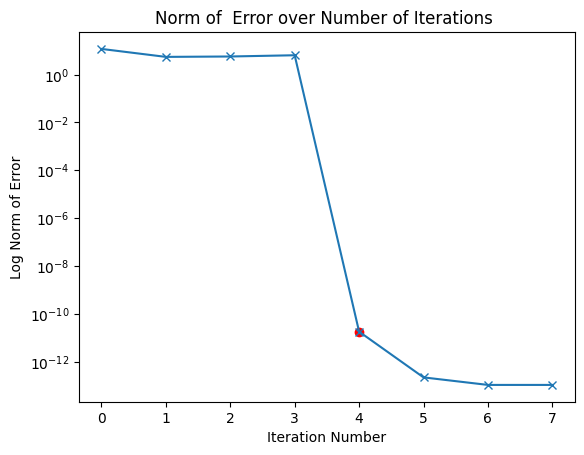

In [14]:

plt.semilogy(error_list , marker ="x")
plt.scatter((n),error_list[n],color="red")
plt.xlabel("Iteration Number")
plt.ylabel("Log Norm of Error")
plt.title("Norm of  Error over Number of Iterations ")